In [1]:
import os
import pickle
from tqdm import tqdm, trange
import os
import numpy as np
from collections import defaultdict

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")
import matplotlib.cm as cm

In [4]:
binding = True
root_path = '/home/alexander/ray_results/cross_play_20K_episodes_binding/2021_03_23/12_37_37'

# binding = False
# root_path = 'home/alexander/ray_results/cross_play_20K_episodes_cheap/2021_03_24/05_30_06'

# root_path = '/home/alexander/ray_results/population_experiments/2021_04_20/14_01_26'
# binding = True

results_filename = os.path.join('cross_play_evals', 'results_' + '_'.join(root_path.split('/')[-3:]) + '.pickle')
results = pickle.load(open(results_filename, 'rb'))

res_dict = defaultdict(list)

for res in results:
    res_dict[(res[0], res[1])].append(res[3])

In [5]:
img_dir = results_filename[:-7]
os.makedirs(img_dir, exist_ok=True)

# Plot welfare in cross-play

In [ ]:
for eval_regime_name, eval_regime_list in [
    ('agents of the same type', 
        (
            ('custom_vs_custom_1', 'custom_vs_custom_1'),  # normal eval
            ('custom_vs_custom_1', 'custom_vs_custom_2'),  # simplest (1)
        )
    ),
    ('both have incorrect notions',
        (
           ('custom_vs_custom_1', 'default_vs_default'),  # 2.1
           ('default_vs_default', 'custom_vs_custom_1'),   # 2.2
            
           ('custom_vs_custom_1', 'custom_vs_custom_2'),  # as baseline
           ('default_vs_default', 'default_vs_default'),
        ),
    ),
    ('second has incorrect notions',
        (
           ('default_vs_custom', 'custom_vs_custom_1'),   # 3.1
           ('custom_vs_custom_1', 'default_vs_custom'),  # 4.1
           ('default_vs_default', 'custom_vs_default'),
           ('custom_vs_default', 'default_vs_default'),
            
           ('custom_vs_custom_1', 'custom_vs_custom_2'),  # as baseline
        ),
    ),
    ('first has incorrect notions',
        (
           ('default_vs_default', 'default_vs_custom'),   # 3.2
           ('default_vs_custom', 'default_vs_default'),  # 4.2
           ('custom_vs_default', 'custom_vs_custom_1'),
           ('custom_vs_custom_1', 'custom_vs_default'),
            
           ('custom_vs_custom_1', 'custom_vs_custom_2'),  # as baseline
        ),
    ),
]:
    for xlabel, xarray, yarray in [
        ('Utilities skew', np.arange(-1, 1.1, 0.4), np.arange(1, 7)),
        ('Fairness coeff', np.arange(0.0, 0.7, 0.1), np.arange(7, 14)),
        ('Prosociality level', np.arange(0, 1.1, 0.2), np.arange(14, 20)),
        ('Hidden layer size', [5, 10, 20, 40, 80, 160], np.arange(20, 26))
    ]:
        plt.figure(figsize=(10, 7))
        for agent_0_match_regime, agent_1_match_regime in eval_regime_list:
            welfare_vals = []
            welfare_stds = []
#             welfare_positive_vals = []
#             welfare_positive_stds = []
            for y in yarray:
                vals = np.array([res['sum_share_of_max'] for res in res_dict[((agent_0_match_regime, agent_1_match_regime), y)]])
                welfare_vals.append(vals.mean())
                welfare_stds.append(vals.mean(axis=1).std())
#                 welfare_positive = (vals > 0)
#                 welfare_positive_vals.append(welfare_positive.mean())
#                 welfare_positive_stds.append(welfare_positive.mean(axis=1).std())
            plt.scatter(xarray, welfare_vals,
                        label=f'{agent_0_match_regime}, {agent_1_match_regime}')
            plt.errorbar(xarray, welfare_vals, yerr=welfare_stds)
#             plt.scatter(xarray, welfare_positive_vals,
#                         label=f'{agent_0_match_regime}, {agent_1_match_regime}')
#             plt.errorbar(xarray, welfare_positive_vals, yerr=welfare_positive_stds)
            plt.ylim(0.3, 1)
            plt.ylabel('Welfare, share of maximum possible welfare')
#             plt.ylabel('% of positive-welfare games')
            plt.xlabel(xlabel)
            suptitle = f'Welfare vs {xlabel}, {"Binding comms" if binding else "cheap comms"}, {eval_regime_name}'
            plt.suptitle(suptitle)
            plt.legend()
            plt.savefig(os.path.join(img_dir, suptitle + '.png'), bbox_inches='tight')
os.system(f'tar -czvf {img_dir}.tar {img_dir}')

# Same but only for particular runs and with num_turns as well

In [19]:
# res_dict[(('default_vs_default', 'custom_vs_custom_1'), 8)]

In [ ]:
# agent_0_match_regime, agent_1_match_regime = ('default_vs_default', 'custom_vs_custom_1')
# agent_0_match_regime, agent_1_match_regime = ('custom_vs_custom_1', 'default_vs_default')
agent_0_match_regime, agent_1_match_regime = ('custom_vs_custom_1', 'custom_vs_custom_2')
for array_i in range(7, 14):
    r0 = np.array([res['player0_share_of_max'] for res in res_dict[((agent_0_match_regime, agent_1_match_regime), array_i)]]).flatten()
    r1 = np.array([res['player1_share_of_max'] for res in res_dict[((agent_0_match_regime, agent_1_match_regime), array_i)]]).flatten()
    w = np.array([res['sum_share_of_max'] for res in res_dict[((agent_0_match_regime, agent_1_match_regime), array_i)]]).flatten()
    num_turns = np.array([res['num_turns'] for res in res_dict[((agent_0_match_regime, agent_1_match_regime), array_i)]]).flatten()
#     sns.displot(w, binwidth=0.3)

#     plt.figure(figsize=(10, 7,))
    sns.displot(w, height=9)
    suptitle = f"welfare distribution, ('{agent_0_match_regime}', '{agent_1_match_regime}'), IA coeff {np.arange(0.0, 0.7, 0.1)[array_i-7]:.1f}"
    plt.suptitle(suptitle)
    plt.savefig(os.path.join('debug', suptitle + '.png'), bbox_inches='tight')
    
#     plt.figure(figsize=(10, 7,))
    sns.displot(num_turns, binwidth=0.3, height=9)
    suptitle = f"num_turns distribution, ('{agent_0_match_regime}', '{agent_1_match_regime}'), IA coeff {np.arange(0.0, 0.7, 0.1)[array_i-7]:.1f}"
    plt.suptitle(suptitle)
#     plt.savefig(os.path.join('debug', suptitle + '.png'), bbox_inches='tight')
    
# os.system(f'tar -czvf debug.tar debug')

# Now plot agent payoffs instead of welfare for cross-play

0

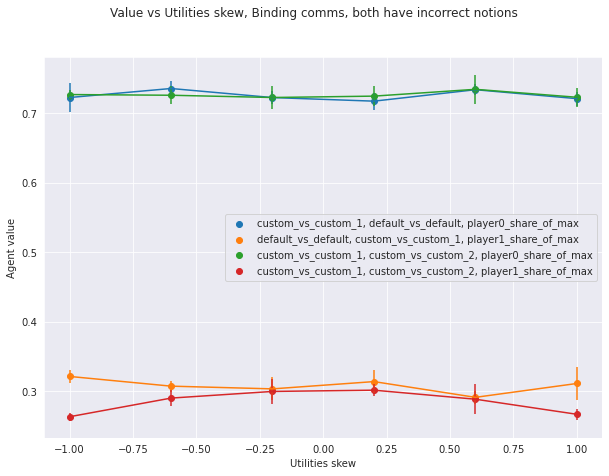

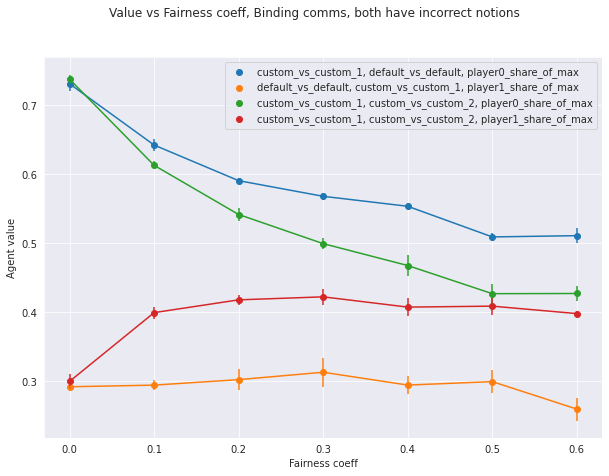

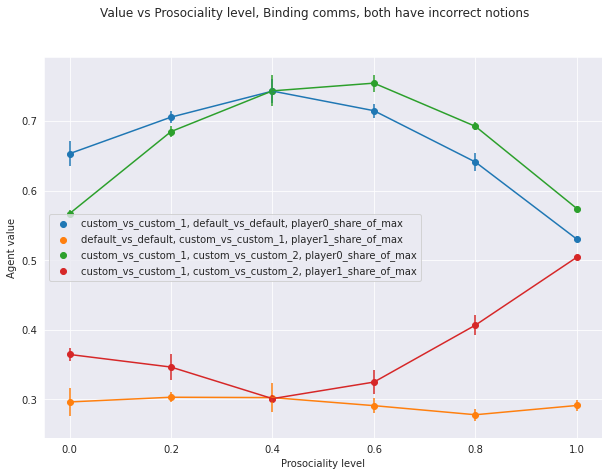

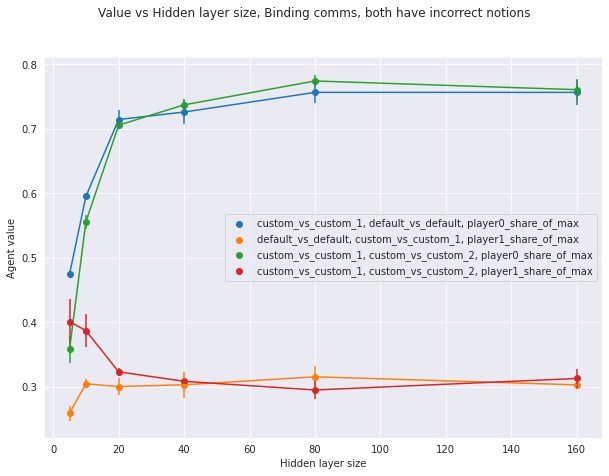

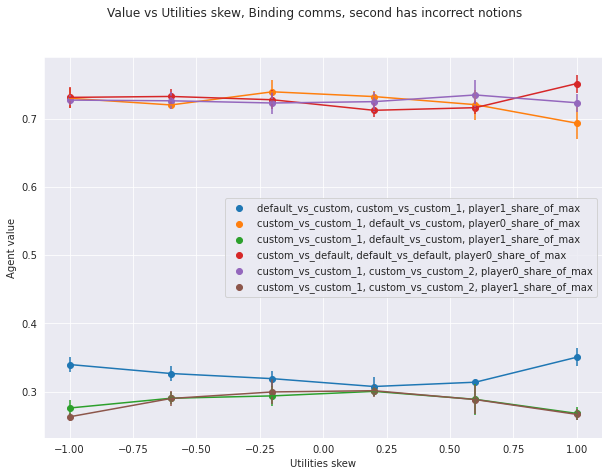

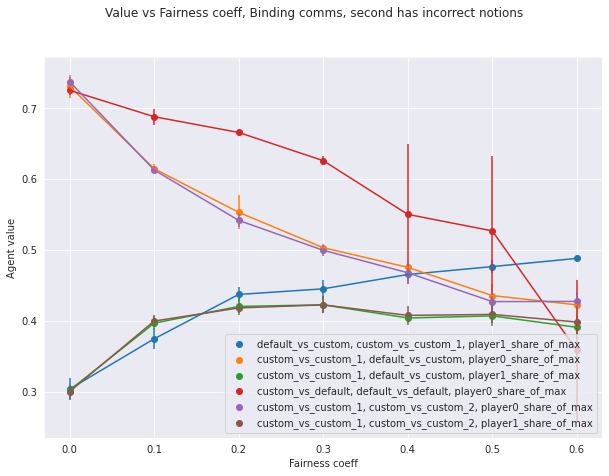

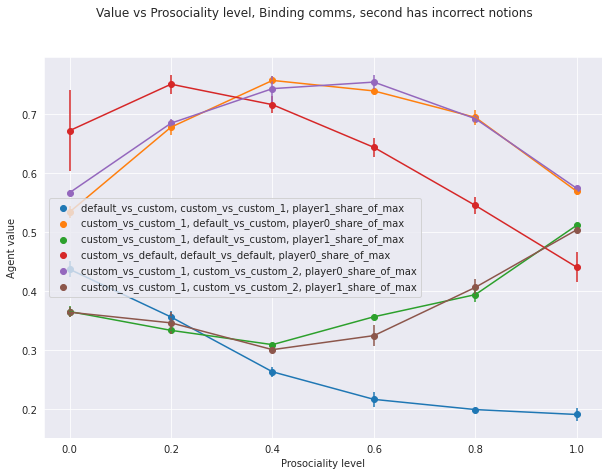

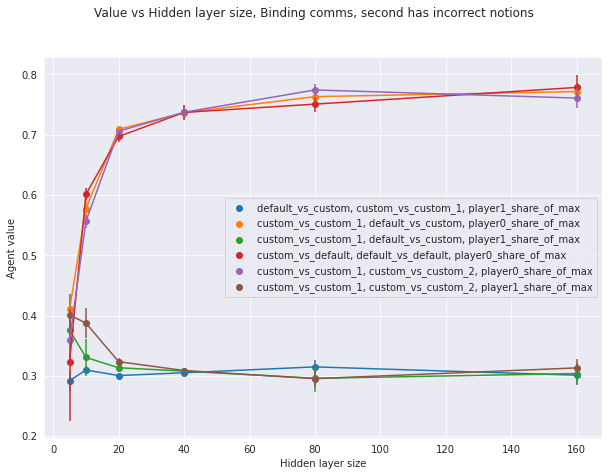

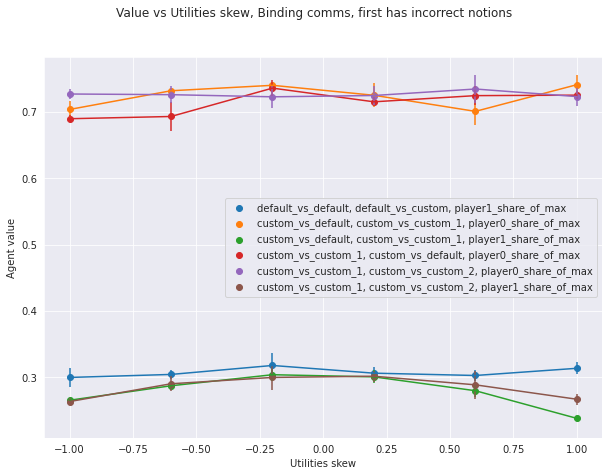

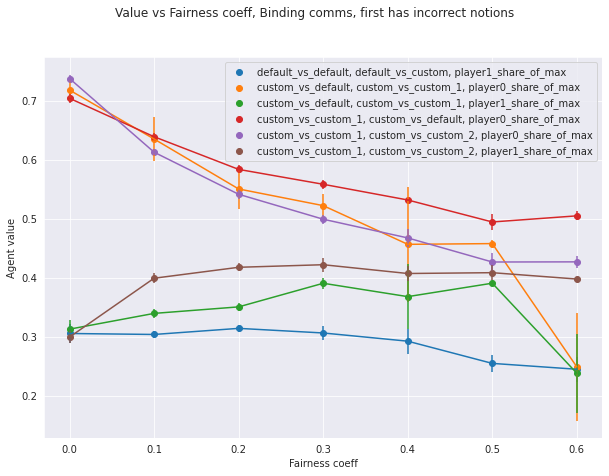

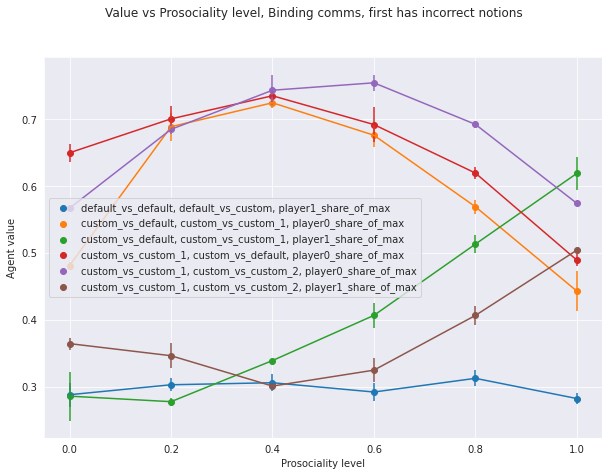

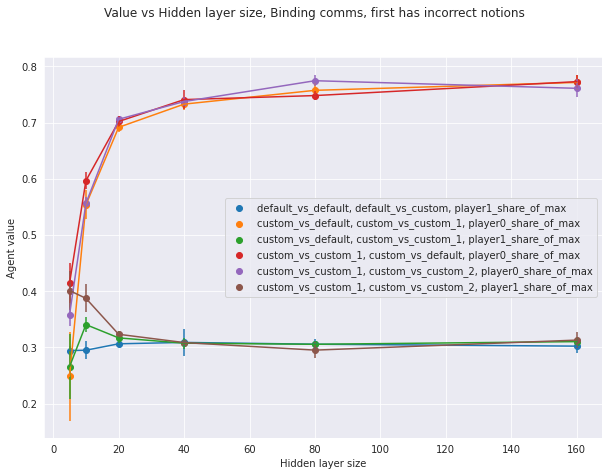

In [59]:
for eval_regime_name, eval_regime_list in [
    ('both have incorrect notions',
        (
           ('custom_vs_custom_1', 'default_vs_default'),  # 2.1
           ('default_vs_default', 'custom_vs_custom_1'),   # 2.2
            
           ('custom_vs_custom_1', 'custom_vs_custom_2'),  # as baseline
        ),
    ),
    ('second has incorrect notions',
        (
           ('default_vs_custom', 'custom_vs_custom_1'),   # 3.1
           ('custom_vs_custom_1', 'default_vs_custom'),  # 4.1
           ('default_vs_default', 'custom_vs_default'),
           ('custom_vs_default', 'default_vs_default'),
            
           ('custom_vs_custom_1', 'custom_vs_custom_2'),  # as baseline
        ),
    ),
    ('first has incorrect notions',
        (
           ('default_vs_default', 'default_vs_custom'),   # 3.2
           ('default_vs_custom', 'default_vs_default'),  # 4.2
           ('custom_vs_default', 'custom_vs_custom_1'),
           ('custom_vs_custom_1', 'custom_vs_default'),
            
           ('custom_vs_custom_1', 'custom_vs_custom_2'),  # as baseline
        ),
    ),
]:
    for xlabel, xarray, yarray in [
        ('Utilities skew', np.arange(-1, 1.1, 0.4), np.arange(1, 7)),
        ('Fairness coeff', np.arange(0.0, 0.7, 0.1), np.arange(7, 14)),
        ('Prosociality level', np.arange(0, 1.1, 0.2), np.arange(14, 20)),
        ('Hidden layer size', [5, 10, 20, 40, 80, 160], np.arange(20, 26))
    ]:
        plt.figure(figsize=(10, 7))
        for agent_0_match_regime, agent_1_match_regime in eval_regime_list:
            reward_names = []
            if agent_0_match_regime.startswith('custom'):
                reward_names.append('player0_share_of_max')
            if agent_1_match_regime.endswith('custom') or agent_1_match_regime.endswith('custom_1') \
                or agent_1_match_regime.endswith('custom_2'):
                reward_names.append('player1_share_of_max')
            for reward_name in reward_names:
                welfare_vals = []
                welfare_stds = []
                for y in yarray:
                    vals = np.array([res[reward_name] for res in res_dict[((agent_0_match_regime,
                                                                            agent_1_match_regime), y)]])
                    welfare_vals.append(vals.mean())
                    welfare_stds.append(vals.mean(axis=1).std())
                plt.scatter(xarray, welfare_vals,
                            label=f'{agent_0_match_regime}, {agent_1_match_regime}, {reward_name}')
                plt.errorbar(xarray, welfare_vals, yerr=welfare_stds)
                plt.ylabel('Agent value')
                plt.xlabel(xlabel)
                suptitle = f'Value vs {xlabel}, {"Binding comms" if binding else "cheap comms"}, {eval_regime_name}'
                plt.suptitle(suptitle)
                plt.legend()
                plt.savefig(os.path.join(img_dir, suptitle + '.png'), bbox_inches='tight')
os.system(f'tar -czvf {img_dir}.tar {img_dir}')

# Player 0 vs player 1 payoff plots in cross-play and self-play

In [6]:
all_vals = []
for eval_regime_name, eval_regime_list in [
    ('both have incorrect notions',
        (
#            ('custom_vs_custom_1', 'default_vs_default'),  # 2.1
           ('default_vs_default', 'custom_vs_custom_1'),   # 2.2
            
           ('custom_vs_custom_1', 'custom_vs_custom_2'),  # as baseline
        ),
    ),
#     ('second has incorrect notions',
#         (
#            ('default_vs_custom', 'custom_vs_custom_1'),   # 3.1
#            ('custom_vs_custom_1', 'default_vs_custom'),  # 4.1
#            ('default_vs_default', 'custom_vs_default'),
#            ('custom_vs_default', 'default_vs_default'),
            
# #            ('custom_vs_custom_1', 'custom_vs_custom_2'),  # as baseline
#         ),
#     ),
#     ('first has incorrect notions',
#         (
#            ('default_vs_default', 'default_vs_custom'),   # 3.2
#            ('default_vs_custom', 'default_vs_default'),  # 4.2
#            ('custom_vs_default', 'custom_vs_custom_1'),
#            ('custom_vs_custom_1', 'custom_vs_default'),
            
# #            ('custom_vs_custom_1', 'custom_vs_custom_2'),  # as baseline
#         ),
#     ),
]:
    for xlabel, xarray, yarray in [
#         ('Utilities skew', np.arange(-1, 1.1, 0.4), np.arange(1, 7)),
        ('Fairness coeff', np.arange(0.0, 0.7, 0.1), np.arange(7, 14)),
#         ('Prosociality level', np.arange(0, 1.1, 0.2), np.arange(14, 20)),
#         ('Hidden layer size', [5, 10, 20, 40, 80, 160], np.arange(20, 26))
    ]:
        for agent_0_match_regime, agent_1_match_regime in eval_regime_list:
            for i, array_pos in enumerate(yarray):
                if not (agent_0_match_regime, agent_1_match_regime) == ('custom_vs_custom_1', 'custom_vs_custom_2') \
                   and i == 0:
                    continue
                if (agent_0_match_regime, agent_1_match_regime) == ('custom_vs_custom_1', 'custom_vs_custom_2'):
                    cross_play = False
                else:
                    cross_play = True  # in the strong sense, meaning that value functions are different
                vals = np.array([res['player0_share_of_max'] for res in res_dict[((agent_0_match_regime,
                                                                        agent_1_match_regime), array_pos)]])
                x = vals.mean()
                vals = np.array([res['player1_share_of_max'] for res in res_dict[((agent_0_match_regime,
                                                                        agent_1_match_regime), array_pos)]])
                y = vals.mean()
#                 suptitle = f'Value vs {xlabel}, {"Binding comms" if binding else "cheap comms"}, {eval_regime_name}'
#                 print(suptitle, agent_0_match_regime, agent_1_match_regime, reward_name)
                all_vals.append((x, y, xarray[i], binding, cross_play))
# os.system(f'tar -czvf {img_dir}.tar {img_dir}')

In [7]:
x, y, param_val, binding_param, cross_play = zip(*all_vals)

In [8]:
len(x)

13

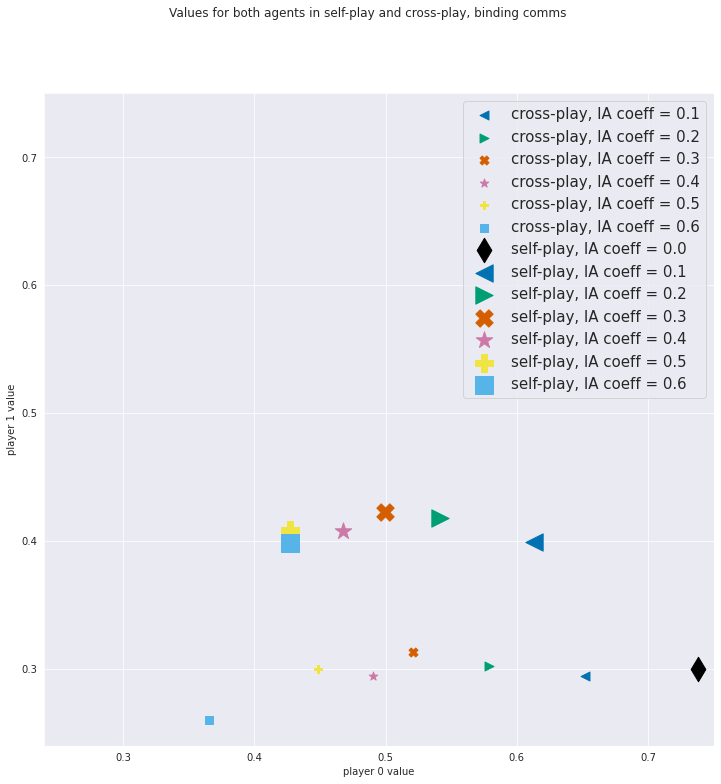

In [9]:
# plt.figure(figsize=(12, 12))
# plt.xlim((0.24, 0.75))
# plt.ylim((0.24, 0.75))
# for i in range(len(x)):
#     label = f"{'cross-play' if cross_play[i] else 'self-play'}, IA coeff = {param_val[i]:.1f}"
#     color_list = ['#0072B2', '#009E73', '#D55E00', '#CC79A7', '#F0E442', '#56B4E9',   '#000000', '#0072B2', '#009E73', '#D55E00', '#CC79A7', '#F0E442', '#56B4E9',]
#     marker_list = ['<', '>', 'X', '*', 'P', 's',   'd', '<', '>', 'X', '*', 'P', 's']
#     s = 80 if cross_play[i] else 300
#     plt.scatter(x[i], y[i], label=label, color=color_list[i], marker=marker_list[i], s=s)
    
# plt.xlabel('player 0 value')
# plt.ylabel('player 1 value')
# plt.suptitle(f'Values for both agents in self-play and cross-play, {"binding comms" if binding else "cheap comms"}')
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys(), prop={'size': 15})

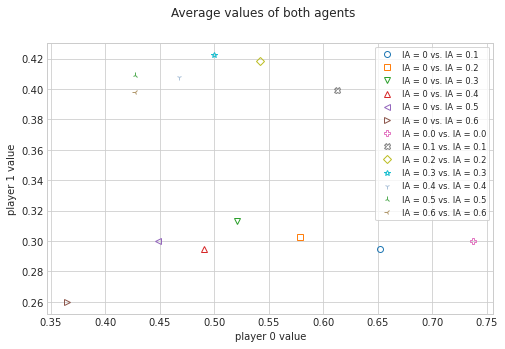

In [17]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
plt.switch_backend("agg")
plt.style.use("seaborn-whitegrid")
COLORS = list(mcolors.TABLEAU_COLORS) + list(mcolors.XKCD_COLORS)
RANDOM_MARKERS = ["1", "2", "3", "4", "8", "s", "p", "P", "*", "h", "H", "+"]
MARKERS = ["o", "s", "v", "^", "<", ">", "P", "X", "D", "*"] + RANDOM_MARKERS

plt.figure(figsize=(8, 5))
for i in range(len(x)):
    label = f"{'cross-play' if cross_play[i] else 'self-play'}, IA coeff = {param_val[i]:.1f}"
    if not cross_play[i]:
        label = f'IA = {param_val[i]:.1f} vs. IA = {param_val[i]:.1f}'
    else:
        label = f'IA = 0.0 vs. IA = {param_val[i]:.1f}'
    color_list = ['#0072B2', '#009E73', '#D55E00', '#CC79A7', '#F0E442', '#56B4E9',   '#000000', '#0072B2', '#009E73', '#D55E00', '#CC79A7', '#F0E442', '#56B4E9',]
    marker_list = ['<', '>', 'X', '*', 'P', 's',   'd', '<', '>', 'X', '*', 'P', 's']
    s = 80 if cross_play[i] else 300
    plt.plot(
        x[i],
        y[i],
        markerfacecolor="none",
        markeredgecolor=COLORS[i],
        linestyle="None",
        marker=MARKERS[i],
        color=COLORS[i],
        label=label,
    )
    
plt.xlabel('player 0 value')
plt.ylabel('player 1 value')
plt.suptitle(f'Average values of both agents')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), numpoints=1,
    frameon=True,
    fontsize="small",)

In [ ]:

# Legend
plt.legend(
    numpoints=1,
    frameon=True,
    fontsize="small",
    )
# Plotting lines
plt.plot(
    df.index,
    df[col_i],
    label=label_i,
    color=COLORS[i],
)
# Plotting points (with countours only, not filled)
plt.plot(
    x,
    y,
    markerfacecolor="none"
    markeredgecolor=COLORS[i],
    linestyle="None",
    marker=MARKERS[i],
    color=COLORS[i],
    label=label_i,
)

# Welfare in cross-play for population training

In [3]:
res_dict = defaultdict(list)

binding = True
root_path = '/home/alexander/ray_results/population_experiments/2021_04_20/14_01_26'
results_filename = os.path.join('cross_play_evals', 'results_' + '_'.join(root_path.split('/')[-3:]) + '.pickle')
# results_filename = os.path.join('cross_play_evals', 'results_' + '_'.join(root_path.split('/')[-3:]) + '_b.pickle')
results = pickle.load(open(results_filename, 'rb'))
for res in results:
#     print(res[0], res[1])
    res_dict[(res[0], res[1])].append(res[3])
    
binding = True
root_path_single = '/home/alexander/ray_results/cross_play_20K_episodes_binding/2021_03_23/12_37_37'
results_filename_single = os.path.join('cross_play_evals', 'results_' + '_'.join(root_path_single.split('/')[-3:]) + '.pickle')
results_single = pickle.load(open(results_filename_single, 'rb'))
for res in results_single:
    res_dict[(res[0], res[1])].append(res[3])

In [18]:
# default_cycler = (cycler(color=['r', 'g', 'b', 'y']) +
#                   cycler(linestyle=['-', '--', ':', '-.']))

# CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
#                   '#f781bf', '#a65628', '#984ea3',
#                   '#999999', '#e41a1c', '#dede00']

# axes.prop_cycle: cycler(color, [#0072B2, #009E73, #D55E00, #CC79A7,
#                  #F0E442, #56B4E9])

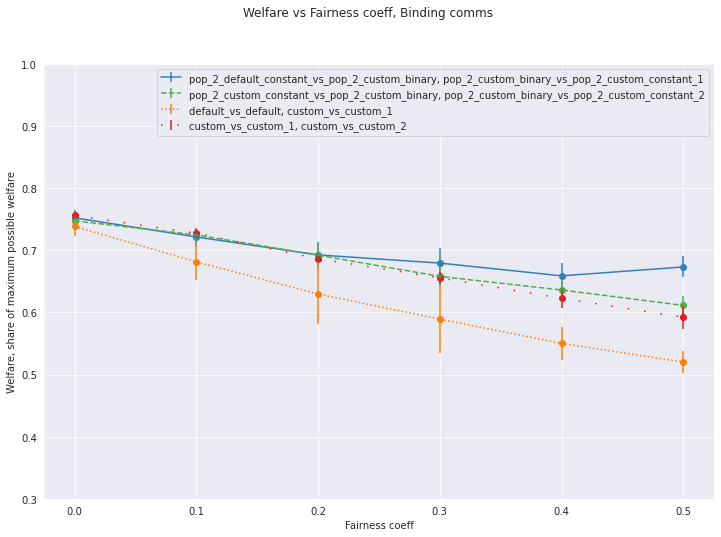

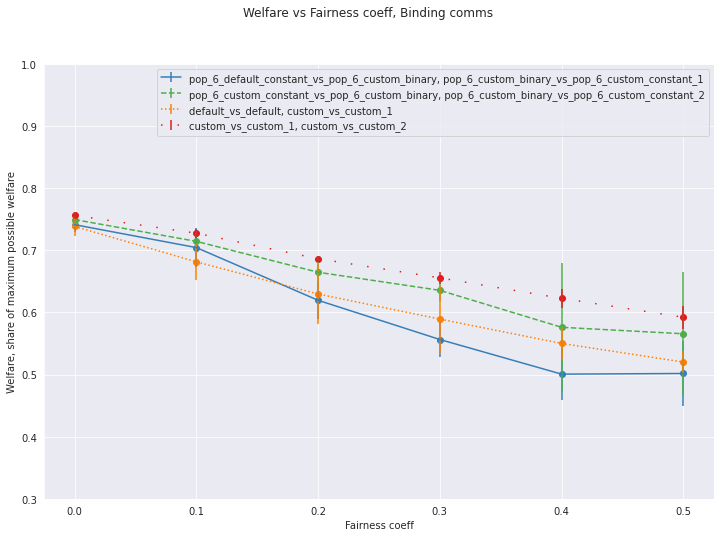

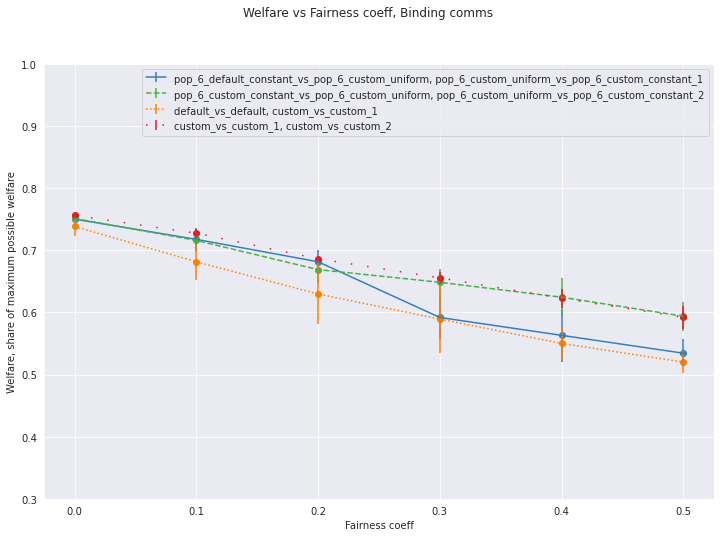

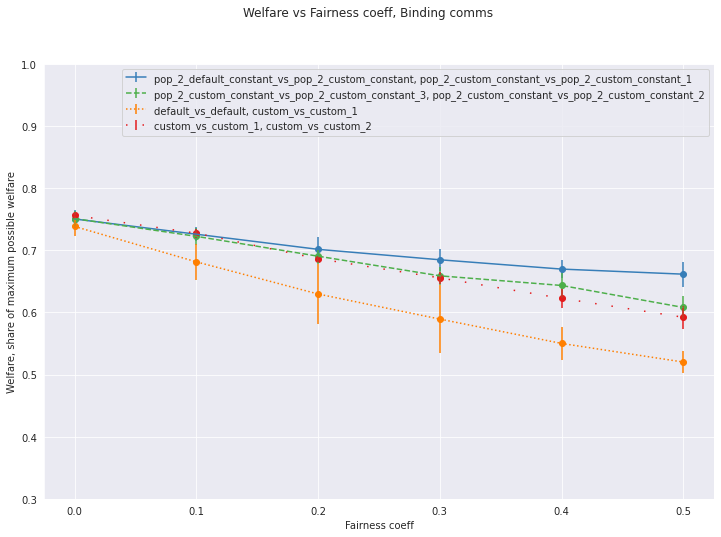

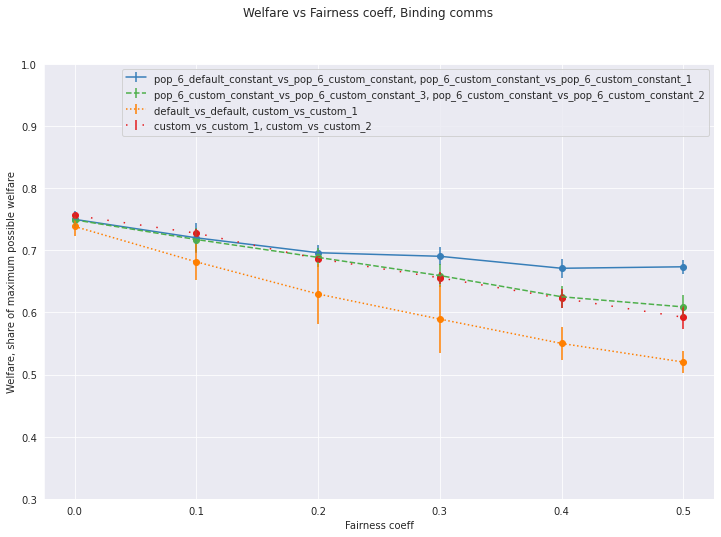

In [23]:
# for eval_regime_name, eval_regime_list in [
#     #   for ('default_vs_custom_pop_1', 'custom_pop_vs_custom_1') eval - population training
#     ('default pop vs custom pop', 
#         (
#             ('pop_2_default_constant_vs_pop_2_custom_binary', 'pop_2_custom_binary_vs_pop_2_custom_constant_1'),
#             ('pop_6_default_constant_vs_pop_6_custom_binary', 'pop_6_custom_binary_vs_pop_6_custom_constant_1',),
#             ('pop_6_default_constant_vs_pop_6_custom_uniform', 'pop_6_custom_uniform_vs_pop_6_custom_constant_1',),
#             ('pop_2_default_constant_vs_pop_2_custom_constant', 'pop_2_custom_constant_vs_pop_2_custom_constant_1',),
#             ('pop_6_default_constant_vs_pop_6_custom_constant', 'pop_6_custom_constant_vs_pop_6_custom_constant_1',),
#         )
#     ),
#     #   for ('custom_1_vs_custom_pop', 'custom_pop_vs_custom_2') eval - baseline
#     ('custom pop vs custom pop',
#         (
#             ('pop_2_custom_constant_vs_pop_2_custom_binary', 'pop_2_custom_binary_vs_pop_2_custom_constant_2'),
#             ('pop_6_custom_constant_vs_pop_6_custom_binary', 'pop_6_custom_binary_vs_pop_6_custom_constant_2'),
#             ('pop_6_custom_constant_vs_pop_6_custom_uniform', 'pop_6_custom_uniform_vs_pop_6_custom_constant_2'),
#             ('pop_2_custom_constant_vs_pop_2_custom_constant_3', 'pop_2_custom_constant_vs_pop_2_custom_constant_2'),
#             ('pop_6_custom_constant_vs_pop_6_custom_constant_3', 'pop_6_custom_constant_vs_pop_6_custom_constant_2'),
#         ),
#     ),
# ]:
eval_lists = [
    (
        ('pop_2_default_constant_vs_pop_2_custom_binary', 'pop_2_custom_binary_vs_pop_2_custom_constant_1'),
        ('pop_6_default_constant_vs_pop_6_custom_binary', 'pop_6_custom_binary_vs_pop_6_custom_constant_1',),
        ('pop_6_default_constant_vs_pop_6_custom_uniform', 'pop_6_custom_uniform_vs_pop_6_custom_constant_1',),
        ('pop_2_default_constant_vs_pop_2_custom_constant', 'pop_2_custom_constant_vs_pop_2_custom_constant_1',),
        ('pop_6_default_constant_vs_pop_6_custom_constant', 'pop_6_custom_constant_vs_pop_6_custom_constant_1',),
    ),
    (
        ('pop_2_custom_constant_vs_pop_2_custom_binary', 'pop_2_custom_binary_vs_pop_2_custom_constant_2'),
        ('pop_6_custom_constant_vs_pop_6_custom_binary', 'pop_6_custom_binary_vs_pop_6_custom_constant_2'),
        ('pop_6_custom_constant_vs_pop_6_custom_uniform', 'pop_6_custom_uniform_vs_pop_6_custom_constant_2'),
        ('pop_2_custom_constant_vs_pop_2_custom_constant_3', 'pop_2_custom_constant_vs_pop_2_custom_constant_2'),
        ('pop_6_custom_constant_vs_pop_6_custom_constant_3', 'pop_6_custom_constant_vs_pop_6_custom_constant_2'),
    ),
]
for eval_regime_i in range(len(eval_lists[0])):
    for xlabel, xarray, yarray in [
        # first index in yarray is responsible for default_params, skip it
        ('Fairness coeff', np.arange(0.0, 0.6, 0.1), None,),
    #         ('Fairness coeff (fully coop)', np.arange(0.0, 0.6, 0.1), np.arange(7, 13)),
    ]:
        plt.figure(figsize=(12, 8))
        custom_cycler = (cycler(color=['#377eb8', '#4daf4a', '#ff7f00', '#e41a1c']) +
                  cycler(linestyle=['-', '--', ':', (0, (1, 10))]))
#                   cycler(linestyle=['-', '--', ':', '-.']))
        ax = plt.gca()
        ax.set_prop_cycle(custom_cycler)
    #     for agent_0_match_regime, agent_1_match_regime in eval_lists:
    
        cur_evals = [eval_list[eval_regime_i] + (np.arange(1, 7),) for eval_list in eval_lists] + \
            [('default_vs_default', 'custom_vs_custom_1', np.arange(7, 13)), ('custom_vs_custom_1', 'custom_vs_custom_2', np.arange(7, 13)),]
#         np.arange(1, 7)
#         np.arange(7, 14)
        for (cur_agent_0_match_regime, cur_agent_1_match_regime, yarray) in cur_evals:
#             print(cur_agent_0_match_regime, cur_agent_1_match_regime, yarray)
#             print(yarray)
#             for y in yarray:
#                 print(len(res_dict[((cur_agent_0_match_regime, cur_agent_1_match_regime), y)]))
#         for (cur_agent_0_match_regime, cur_agent_1_match_regime) in [
#             (agent_0_match_regime, agent_1_match_regime),
#             (agent_0_match_regime.replace('default_constant', 'custom_constant'),
#              agent_1_match_regime.replace('default_constant', 'custom_constant'))]:
            welfare_vals = []
            welfare_stds = []
#             welfare_positive_vals = []
#             welfare_positive_stds = []
            for y in yarray:
                vals = np.array([res['sum_share_of_max'] for res in res_dict[((cur_agent_0_match_regime, cur_agent_1_match_regime), y)]])
#                 print(cur_agent_0_)
#                 print(agent_0_match_regime, agent_1_match_regime)
#                 print(xlabel, xarray, yarray)
#                 print(vals.shape)
                welfare_vals.append(vals.mean())
                welfare_stds.append(vals.mean(axis=1).std())
#                 welfare_positive = (vals > 0)
#                 welfare_positive_vals.append(welfare_positive.mean())
#                 welfare_positive_stds.append(welfare_positive.mean(axis=1).std())
            plt.scatter(xarray, welfare_vals,)
            bar = plt.errorbar(xarray, welfare_vals, yerr=welfare_stds, label=f'{cur_agent_0_match_regime}, {cur_agent_1_match_regime}')
#             plt.scatter(xarray, welfare_positive_vals,
#                         label=f'{agent_0_match_regime}, {agent_1_match_regime}')
#             plt.errorbar(xarray, welfare_positive_vals, yerr=welfare_positive_stds)

        plt.ylim(0.3, 1)
        plt.ylabel('Welfare, share of maximum possible welfare')
#             plt.ylabel('% of positive-welfare games')
        plt.xlabel(xlabel)
        suptitle = f'Welfare vs {xlabel}, {"Binding comms" if binding else "cheap comms"}'
#             suptitle = f'Welfare vs {xlabel}, {"Binding comms" if binding else "cheap comms"}, {eval_regime_name}'
        plt.suptitle(suptitle)
        plt.legend()
#             plt.savefig(os.path.join(img_dir, suptitle + '.png'), bbox_inches='tight')
# os.system(f'tar -czvf {img_dir}.tar {img_dir}')

# Best response eval

In [28]:
binding = True

root_path = '/home/alexander/ray_results/cross_play_20K_episodes_binding/2021_03_23/12_37_37'
results_filename = os.path.join('cross_play_evals', 'results_' + '_'.join(root_path.split('/')[-3:]) + '.pickle')
results = pickle.load(open(results_filename, 'rb'))
res_dict = defaultdict(list)
for res in results:
    res_dict[(res[0], res[1])].append(res[3])

br_fixed_0_root_path = '/home/alexander/ray_results/cross_play_20K_episodes_best_response_fixed_agent_0/2021_05_03/00_35_50'
br_fixed_0_results_filename = os.path.join('cross_play_evals', 'results_' + '_'.join(br_fixed_0_root_path.split('/')[-3:]) + '.pickle')
br_fixed_0_results = pickle.load(open(br_fixed_0_results_filename, 'rb'))
br_fixed_0_res_dict = defaultdict(list)
for res in br_fixed_0_results:
    br_fixed_0_res_dict[(res[0], res[1])].append(res[3])

br_fixed_1_root_path = '/home/alexander/ray_results/cross_play_20K_episodes_best_response_fixed_agent_1/2021_05_03/09_05_24'
br_fixed_1_results_filename = os.path.join('cross_play_evals', 'results_' + '_'.join(br_fixed_1_root_path.split('/')[-3:]) + '.pickle')
br_fixed_1_results = pickle.load(open(br_fixed_1_results_filename, 'rb'))
br_fixed_1_res_dict = defaultdict(list)
for res in br_fixed_1_results:
    br_fixed_1_res_dict[(res[0], res[1])].append(res[3])

In [26]:
# img_dir = results_filename[:-7]
# os.makedirs(img_dir, exist_ok=True)

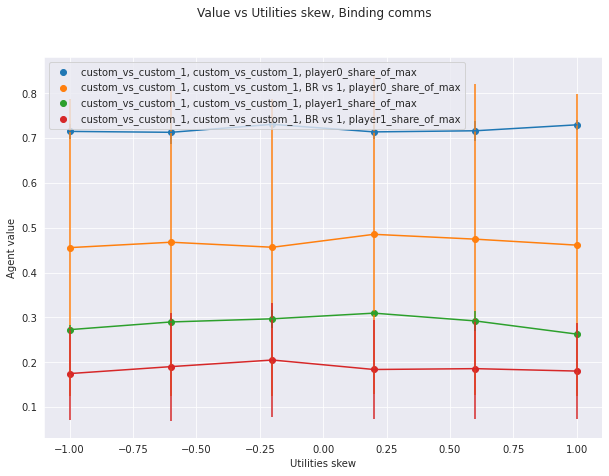

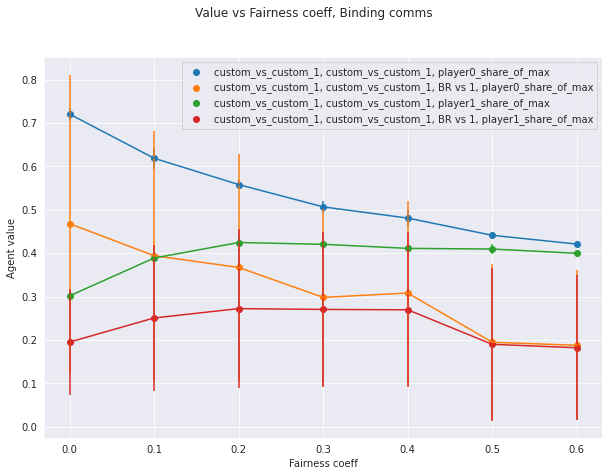

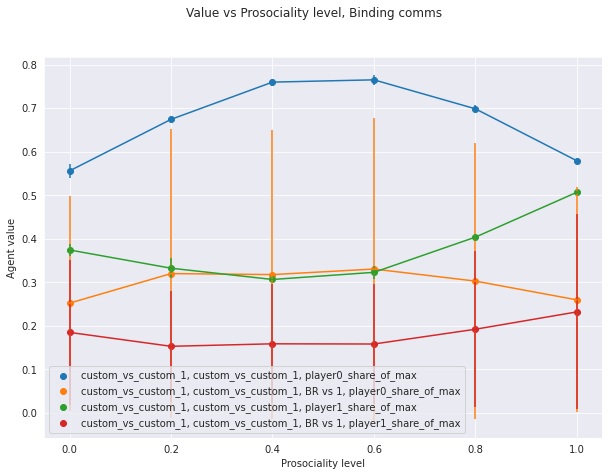

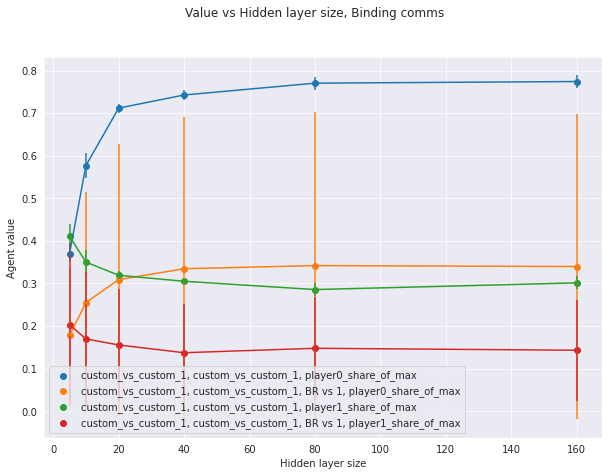

In [35]:
for eval_regime_name, eval_regime_list in [
    ('self-play',
        (
            ('custom_vs_custom_1', 'custom_vs_custom_1'),
        )
    )
#     ('both have incorrect notions',
#         (
#            ('custom_vs_custom_1', 'default_vs_default'),  # 2.1
#            ('default_vs_default', 'custom_vs_custom_1'),   # 2.2
            
#            ('custom_vs_custom_1', 'custom_vs_custom_2'),  # as baseline
#         ),
#     ),
#     ('second has incorrect notions',
#         (
#            ('default_vs_custom', 'custom_vs_custom_1'),   # 3.1
#            ('custom_vs_custom_1', 'default_vs_custom'),  # 4.1
#            ('default_vs_default', 'custom_vs_default'),
#            ('custom_vs_default', 'default_vs_default'),
            
#            ('custom_vs_custom_1', 'custom_vs_custom_2'),  # as baseline
#         ),
#     ),
#     ('first has incorrect notions',
#         (
#            ('default_vs_default', 'default_vs_custom'),   # 3.2
#            ('default_vs_custom', 'default_vs_default'),  # 4.2
#            ('custom_vs_default', 'custom_vs_custom_1'),
#            ('custom_vs_custom_1', 'custom_vs_default'),
            
#            ('custom_vs_custom_1', 'custom_vs_custom_2'),  # as baseline
#         ),
#     ),
]:
    for xlabel, xarray, yarray in [
        ('Utilities skew', np.arange(-1, 1.1, 0.4), np.arange(1, 7)),
        ('Fairness coeff', np.arange(0.0, 0.7, 0.1), np.arange(7, 14)),
        ('Prosociality level', np.arange(0, 1.1, 0.2), np.arange(14, 20)),
        ('Hidden layer size', [5, 10, 20, 40, 80, 160], np.arange(20, 26))
    ]:
        plt.figure(figsize=(10, 7))
        for agent_0_match_regime, agent_1_match_regime in eval_regime_list:
            reward_names = []
            if agent_0_match_regime.startswith('custom'):
                reward_names.append('player0_share_of_max')
            if agent_1_match_regime.endswith('custom') or agent_1_match_regime.endswith('custom_1') \
                or agent_1_match_regime.endswith('custom_2'):
                reward_names.append('player1_share_of_max')
            for reward_name in reward_names:
                welfare_vals = []
                welfare_stds = []
                for y in yarray:
                    vals = np.array([res[reward_name] for res in res_dict[((agent_0_match_regime,
                                                                            agent_1_match_regime), y)]])
                    welfare_vals.append(vals.mean())
                    welfare_stds.append(vals.mean(axis=1).std())
                plt.scatter(xarray, welfare_vals,
                            label=f'{agent_0_match_regime}, {agent_1_match_regime}, {reward_name}')
                plt.errorbar(xarray, welfare_vals, yerr=welfare_stds)
                
#                 br_fixed_0_welfare_vals = []
#                 br_fixed_0_welfare_stds = []
#                 for y in yarray:
#                     vals = np.array([res[reward_name] for res in br_fixed_0_res_dict[((agent_0_match_regime,
#                                                                             agent_1_match_regime), y)]])
#                     br_fixed_0_welfare_vals.append(vals.mean())
#                     br_fixed_0_welfare_stds.append(vals.mean(axis=1).std())
#                 plt.scatter(xarray, br_fixed_0_welfare_vals,
#                             label=f'{agent_0_match_regime}, {agent_1_match_regime}, 0 vs BR, {reward_name}')
#                 plt.errorbar(xarray, br_fixed_0_welfare_vals, yerr=br_fixed_0_welfare_stds)
                
                br_fixed_1_welfare_vals = []
                br_fixed_1_welfare_stds = []
                for y in yarray:
                    vals = np.array([res[reward_name] for res in br_fixed_1_res_dict[((agent_0_match_regime,
                                                                            agent_1_match_regime), y)]])
                    br_fixed_1_welfare_vals.append(vals.mean())
                    br_fixed_1_welfare_stds.append(vals.mean(axis=1).std())
                plt.scatter(xarray, br_fixed_1_welfare_vals,
                            label=f'{agent_0_match_regime}, {agent_1_match_regime}, BR vs 1, {reward_name}')
                plt.errorbar(xarray, br_fixed_1_welfare_vals, yerr=br_fixed_1_welfare_stds)
                
                plt.ylabel('Agent value')
                plt.xlabel(xlabel)
#                 suptitle = f'Value vs {xlabel}, {"Binding comms" if binding else "cheap comms"}, {eval_regime_name}'
                suptitle = f'Value vs {xlabel}, {"Binding comms" if binding else "cheap comms"}'
                plt.suptitle(suptitle)
                plt.legend()
#                 plt.savefig(os.path.join(img_dir, suptitle + '.png'), bbox_inches='tight')
# os.system(f'tar -czvf {img_dir}.tar {img_dir}')